In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats
import distribution as dist

In [4]:
dioExams = pd.read_csv("CSV/DiagnosticExams.csv")
dioExams.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Percentage,Flag Codes,Flags
0,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2010,2010,2061214.0,D,Difference in methodology
1,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2011,2011,2037101.0,D,Difference in methodology
2,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2012,2012,2365597.0,D,Difference in methodology
3,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2013,2013,2540546.0,D,Difference in methodology
4,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2014,2014,2709088.0,D,Difference in methodology


In [5]:
dioExams = dioExams[dioExams["Measure"] == "Per 1 000 population"]
dioExams.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Percentage,Flag Codes,Flags
12,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2010,2010,93.6,D,Difference in methodology
13,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2011,2011,91.2,D,Difference in methodology
14,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2012,2012,104.1,D,Difference in methodology
15,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2013,2013,109.8,D,Difference in methodology
16,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2014,2014,115.4,D,Difference in methodology


In [6]:
wantedData = dioExams[["Variable", "Country", "Year", "Percentage"]]
wantedData = wantedData[wantedData["Variable"] == "Computed Tomography exams, total"]
wantedData.head()

,Variable,Country,Year,Percentage
12,"Computed Tomography exams, total",Australia,2010,93.6
13,"Computed Tomography exams, total",Australia,2011,91.2
14,"Computed Tomography exams, total",Australia,2012,104.1
15,"Computed Tomography exams, total",Australia,2013,109.8
16,"Computed Tomography exams, total",Australia,2014,115.4


Percentage
Mean: 135.7888888888889
Std: 58.24474926445814



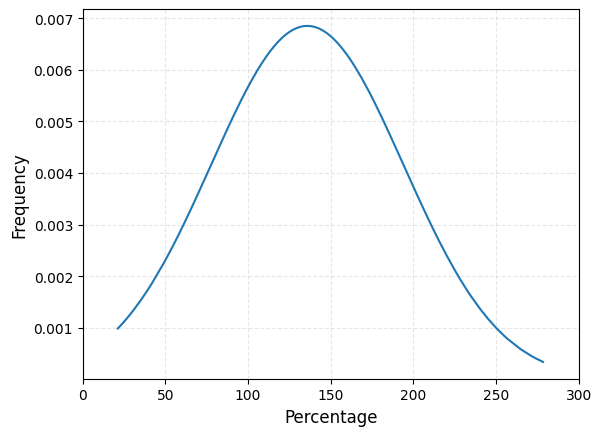

,Variable,Country,Year,Percentage
12,"Computed Tomography exams, total",Australia,2010,0.281493
13,"Computed Tomography exams, total",Australia,2011,0.272162
14,"Computed Tomography exams, total",Australia,2012,0.322317
15,"Computed Tomography exams, total",Australia,2013,0.344479
16,"Computed Tomography exams, total",Australia,2014,0.366252


In [7]:
xCol = "Percentage"
valueMean, valueStd = dist.dist_info(wantedData, xCol)
dist.dist_plot(wantedData, xCol, valueMean, valueStd, 0, 300)
wantedData = dist.add_norm(wantedData, xCol, "Percentage")
wantedData.head()

In [8]:
def getAvg(row, df):
    country = row["Country"]
    #I only want Australia for example
    only_country_df = df[df["Country"] == country]

    num_rows = len(only_country_df.index) 

    avg = only_country_df["Percentage"].sum() / num_rows

    return avg

In [9]:
wantedData.head()

,Variable,Country,Year,Percentage
12,"Computed Tomography exams, total",Australia,2010,0.281493
13,"Computed Tomography exams, total",Australia,2011,0.272162
14,"Computed Tomography exams, total",Australia,2012,0.322317
15,"Computed Tomography exams, total",Australia,2013,0.344479
16,"Computed Tomography exams, total",Australia,2014,0.366252


In [10]:
#averaging data
wantedData["Percent SV"] = wantedData.apply(lambda x: getAvg(x, wantedData), axis = 1)
print(wantedData.to_string())

                              Variable          Country  Year  Percentage  Percent SV
12    Computed Tomography exams, total        Australia  2010    0.281493    0.391492
13    Computed Tomography exams, total        Australia  2011    0.272162    0.391492
14    Computed Tomography exams, total        Australia  2012    0.322317    0.391492
15    Computed Tomography exams, total        Australia  2013    0.344479    0.391492
16    Computed Tomography exams, total        Australia  2014    0.366252    0.391492
17    Computed Tomography exams, total        Australia  2015    0.382193    0.391492
18    Computed Tomography exams, total        Australia  2016    0.381415    0.391492
19    Computed Tomography exams, total        Australia  2017    0.407465    0.391492
20    Computed Tomography exams, total        Australia  2018    0.440902    0.391492
21    Computed Tomography exams, total        Australia  2019    0.465397    0.391492
22    Computed Tomography exams, total        Australi

In [11]:
#fiscCol is the column of fiscal values, must be sorted
#inputCol is the column of results, must be sorted
def createGraph(fiscCol, inputCol): 
    df = pd.DataFrame([inputCol, fiscCol], columns=['Computed Tomography Exams Per 1000 Individuals', 'Total Health Spending in USD per capita'])
    ax1 = df.plot.scatter(x=inputCol, y=fiscCol)
    #probably still need a legend


In [12]:
def add_exam_sv(row, df):
    #one row of data under the country tab
    country = row["Country"]
    #zero in on country and check if the countries are the same, if so, assign to country_df
    country_df = df[df["Country"] == country]
    
    
    if (len(country_df.index) != 0):
        return country_df.iloc[0]["Percent SV"]

In [15]:
update_df = pd.read_csv("CSV/full_dataset2.csv")

update_df["Percent SV"] = update_df.apply(lambda x: add_exam_sv(x, wantedData), axis=1)


update_df.head()
update_df.to_csv('CSV/full_dataset2.csv')

